In [39]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv("http://www.ats.ucla.edu/stat/data/binary.csv")

In [40]:
df.columns = ["admit", "gre", "gpa", "prestige"]
print(df.columns)


Index(['admit', 'gre', 'gpa', 'prestige'], dtype='object')


In [41]:
print(df.describe())

            admit         gre         gpa   prestige
count  400.000000  400.000000  400.000000  400.00000
mean     0.317500  587.700000    3.389900    2.48500
std      0.466087  115.516536    0.380567    0.94446
min      0.000000  220.000000    2.260000    1.00000
25%      0.000000  520.000000    3.130000    2.00000
50%      0.000000  580.000000    3.395000    2.00000
75%      1.000000  660.000000    3.670000    3.00000
max      1.000000  800.000000    4.000000    4.00000


In [42]:
print(df.std())

admit         0.466087
gre         115.516536
gpa           0.380567
prestige      0.944460
dtype: float64


In [43]:
print(pd.crosstab(df['admit'], df['prestige'], rownames=['admit']))

prestige   1   2   3   4
admit                   
0         28  97  93  55
1         33  54  28  12


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000047BF813160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000047BF8D8CC0>]], dtype=object)

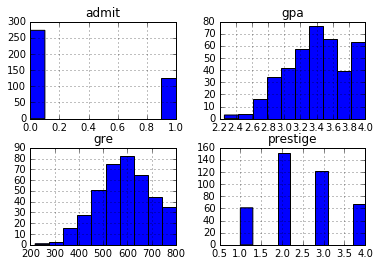

In [44]:
df.hist()

In [45]:
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')
cols_to_keep = ['admit', 'gre', 'gpa']



In [46]:
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
print(data.head())

   admit  gre   gpa  prestige_2  prestige_3  prestige_4
0      0  380  3.61         0.0         1.0         0.0
1      1  660  3.67         0.0         1.0         0.0
2      1  800  4.00         0.0         0.0         0.0
3      1  640  3.19         0.0         0.0         1.0
4      0  520  2.93         0.0         0.0         1.0


In [47]:
data['intercept'] = 1.0

In [48]:
train_cols = data.columns[1:]
# Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)

logit = sm.Logit(data['admit'], data[train_cols])

# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


In [49]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Wed, 27 Apr 2016   Pseudo R-squ.:                 0.08292
Time:                        11:13:02   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0023      0.001      2.070      0.038         0.000     0.004
gpa            0.8040      0.332      2.423      0.015         0.154     1.454
prestige_2    -0.6754      0.316     -2.134      0.0

In [50]:
print(result.conf_int())

                   0         1
gre         0.000120  0.004409
gpa         0.153684  1.454391
prestige_2 -1.295751 -0.055135
prestige_3 -2.016992 -0.663416
prestige_4 -2.370399 -0.732529
intercept  -6.224242 -1.755716


In [55]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in range(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [56]:
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)

# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)

# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])




In [57]:
# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))


C:\Users\smitmi07\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:42: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\smitmi07\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:44: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [58]:
# recreate the dummy variables
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
dummy_ranks = pd.get_dummies(combos['prestige'], prefix='prestige')
dummy_ranks.columns = ['prestige_1', 'prestige_2', 'prestige_3', 'prestige_4']

# keep only what we need for making predictions
cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
combos = combos[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])

# make predictions on the enumerated dataset
combos['admit_pred'] = result.predict(combos[train_cols])

print(combos.head())

     gre       gpa  prestige  intercept  prestige_2  prestige_3  prestige_4  \
0  220.0  2.260000       1.0        1.0         0.0         0.0         0.0   
1  220.0  2.260000       2.0        1.0         1.0         0.0         0.0   
2  220.0  2.260000       3.0        1.0         0.0         1.0         0.0   
3  220.0  2.260000       4.0        1.0         0.0         0.0         1.0   
4  220.0  2.453333       1.0        1.0         0.0         0.0         0.0   

   admit_pred  
0    0.157801  
1    0.087056  
2    0.046758  
3    0.038194  
4    0.179574  


In [63]:
def isolate_and_plot(variable):
    # isolate gre and class rank
    grouped = pd.pivot_table(combos, values=['admit_pred'], index=[variable, 'prestige'],aggfunc=np.mean)
    colors = 'rbgyrbgy'
    for col in combos.prestige.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        plt.plot(plt_data.index.get_level_values(0), plt_data['admit_pred'],color=colors[int(col)])
    plt.xlabel(variable)
    plt.ylabel("P(admit=1)")
    plt.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
    plt.title("Prob(admit=1) isolating " + variable + " and presitge")
    plt.show()

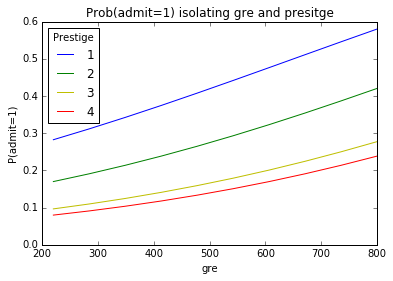

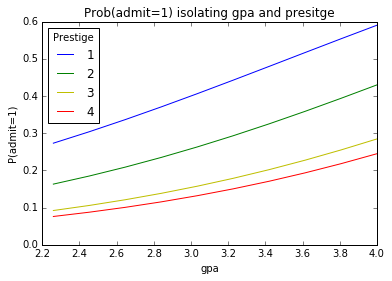

In [65]:
isolate_and_plot('gre')
isolate_and_plot('gpa')